<a href="https://colab.research.google.com/github/shrutikapoyrekar/imageAugmentation/blob/main/usingAlbumenations/imageAugmentationtechniqujes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U albumentations


In [ ]:
!pip install opencv-python==4.5.5.64

     |████████████████████████████████| 60.5 MB 1.2 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
!pip uninstall opencv-python-headless==4.5.5.62

Found existing installation: opencv-python-headless 4.5.5.64
Uninstalling opencv-python-headless-4.5.5.64:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.64.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-65fa80df.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-09fe7800.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

In [ ]:
!pip install opencv-python-headless==4.1.2.30

     |████████████████████████████████| 21.8 MB 1.5 MB/s 


In [ ]:
import albumentations as A
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
path="base_dir/"


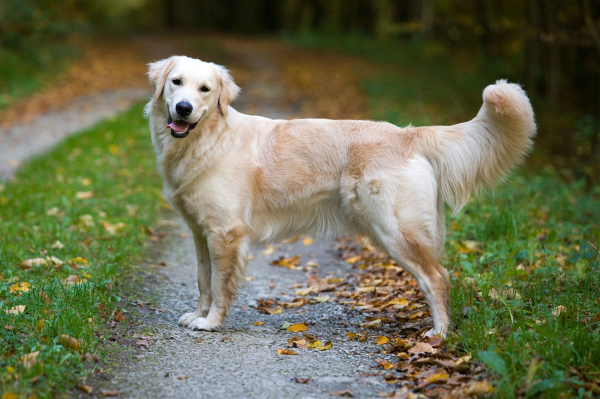

In [ ]:
originalImage = cv2.imread(path+"goldenRetriever.jpeg")
(h, w) = originalImage.shape[:2]
r = 600.0/ originalImage.shape[1]
dim = (600, int(originalImage.shape[0] * r))
originalImage = cv2.resize(originalImage, dim, interpolation=cv2.INTER_AREA)
cv2_imshow(originalImage)

# Color Augmentation

Color augmentation or color jittering deals with altering the color properties of an image by changing its pixel values.

## ColorJitter


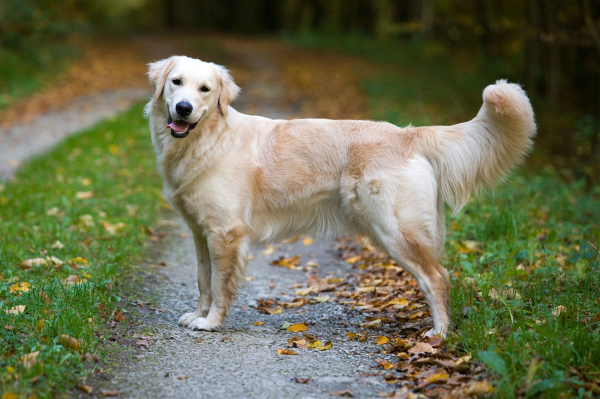

In [ ]:
"""
Color Jitter has brightness, contrast, saturation and hue

        brightness (float or tuple of float (min, max)): How much to jitter brightness.
            brightness_factor is chosen uniformly from [max(0, 1 - brightness), 1 + brightness]
            or the given [min, max]. Should be non negative numbers.
        contrast (float or tuple of float (min, max)): How much to jitter contrast.
            contrast_factor is chosen uniformly from [max(0, 1 - contrast), 1 + contrast]
            or the given [min, max]. Should be non negative numbers.
        saturation (float or tuple of float (min, max)): How much to jitter saturation.
            saturation_factor is chosen uniformly from [max(0, 1 - saturation), 1 + saturation]
            or the given [min, max]. Should be non negative numbers.
        hue (float or tuple of float (min, max)): How much to jitter hue.
            hue_factor is chosen uniformly from [-hue, hue] or the given [min, max].
            Should have 0<= hue <= 0.5 or -0.5 <= min <= max <= 0.5.

"""

aug = A.ColorJitter(brightness=0,contrast=0,saturation=0,hue=0)  #all values at zero give original image
newImageWithNoChange = aug(image=originalImage)['image']
cv2_imshow(newImageWithNoChange)

### Brightness 
Brightness is one of the most common color augmentation techniques. The resultant image becomes darker or lighter compared to the original one.

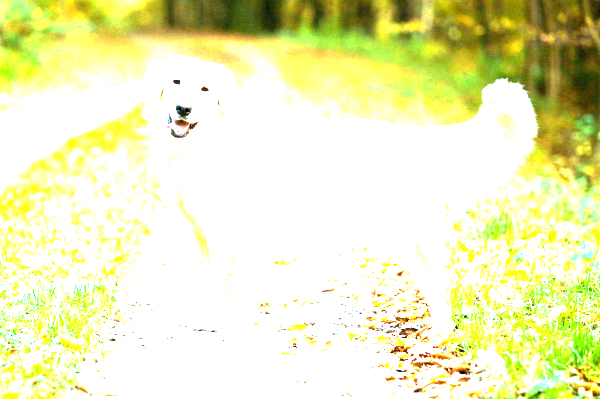

In [ ]:
aug = A.ColorJitter(brightness=(1,5),contrast=0,saturation=0,hue=0)  #changing only brightness
bright1 = aug(image=originalImage)['image']
cv2_imshow(bright1)


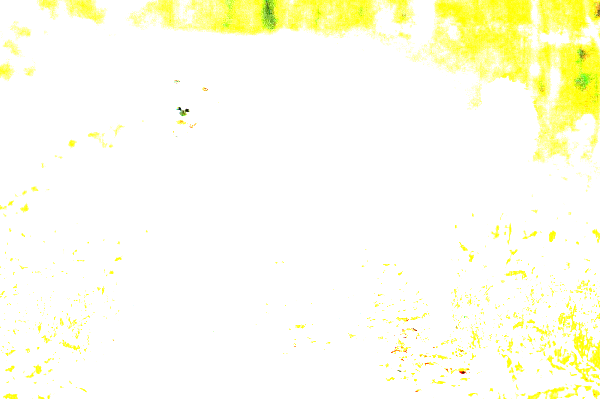

In [ ]:
aug1 = A.ColorJitter(brightness=(1,50),contrast=0,saturation=0,hue=0)  #changing only brightness
bright2 = aug1(image=originalImage)['image']
cv2_imshow(bright2)


### Contrast
The contrast is defined as the degree of separation between the darkest and brightest areas of an image. The contrast of the image can also be changed.

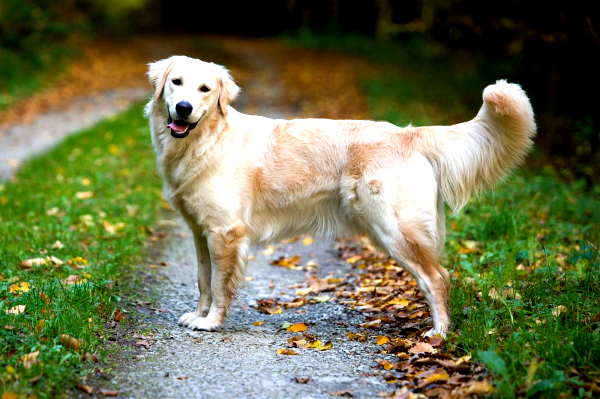

In [ ]:
aug1 = A.ColorJitter(brightness=0,contrast=(1,5),saturation=0,hue=0)  #changing only brightness
contrast = aug1(image=originalImage)['image']
cv2_imshow(contrast)

### Saturation 
Saturation is the separation between colors of an image.

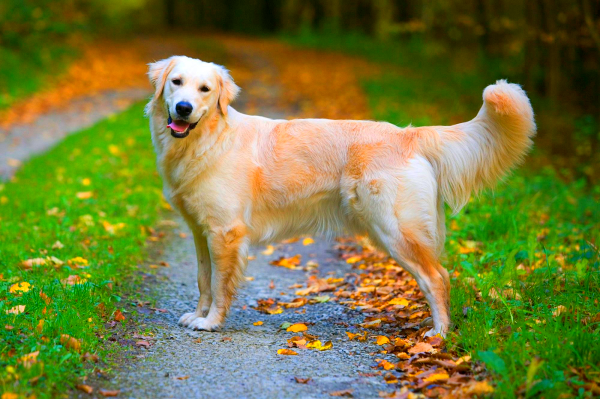

In [ ]:
aug1 = A.ColorJitter(brightness=0,contrast=0,saturation=(0,10),hue=0)  #changing only brightness
saturation = aug1(image=originalImage)['image']
cv2_imshow(saturation)

### Hue
Hue can be described of as the shade of the colors in an image.

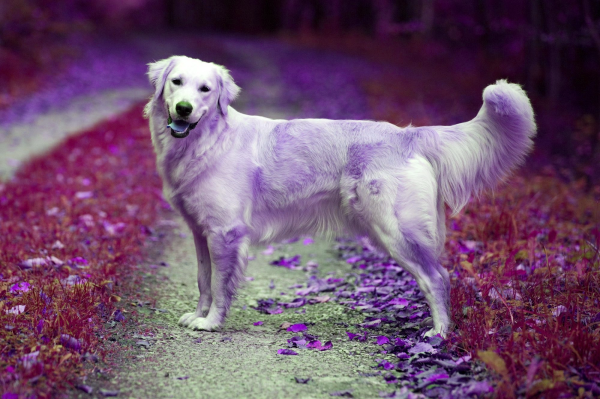

In [ ]:
aug1 = A.ColorJitter(brightness=0,contrast=0,saturation=0,hue=0.5)  #changing only Hue
saturation = aug1(image=originalImage)['image']
cv2_imshow(saturation)

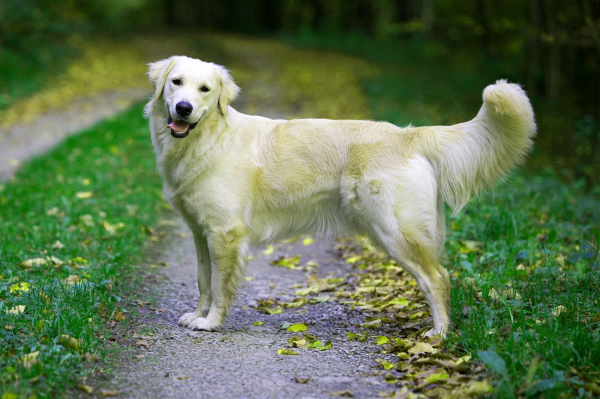

In [ ]:
aug1 = A.ColorJitter(brightness=0,contrast=0,saturation=0,hue=0.2)  #changing only Hue
saturation = aug1(image=originalImage)['image']
cv2_imshow(saturation)

## RGBShift
Randomly shift values for each channel of the input RGB image.


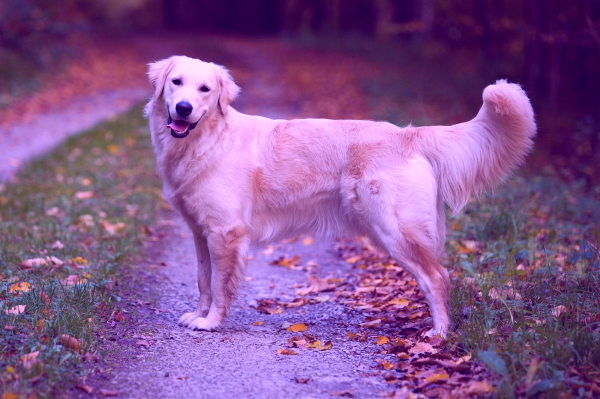

In [ ]:
"""
        r_shift_limit ((int, int) or int): range for changing values for the red channel. If r_shift_limit is a single
            int, the range will be (-r_shift_limit, r_shift_limit). Default: (-20, 20).
        g_shift_limit ((int, int) or int): range for changing values for the green channel. If g_shift_limit is a
            single int, the range  will be (-g_shift_limit, g_shift_limit). Default: (-20, 20).
        b_shift_limit ((int, int) or int): range for changing values for the blue channel. If b_shift_limit is a single
            int, the range will be (-b_shift_limit, b_shift_limit). Default: (-20, 20).
        p (float): probability of applying the transform. Default: 0.5.
"""

aug = A.RGBShift(r_shift_limit=(0,255),g_shift_limit=(-40,40),b_shift_limit=(-30,30),p=0.5)
rgbShift = aug(image=originalImage)['image']
cv2_imshow(rgbShift)

## Posterize

Reduce the number of bits for each color channel.


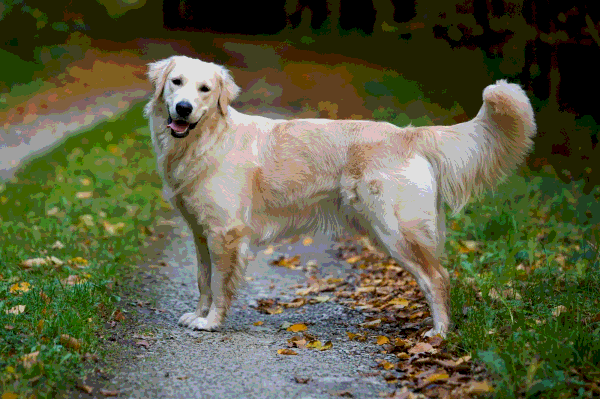

In [ ]:
"""
        num_bits ((int, int) or int,
                  or list of ints [r, g, b],
                  or list of ints [[r1, r1], [g1, g2], [b1, b2]]): number of high bits.
            If num_bits is a single value, the range will be [num_bits, num_bits].
            Must be in range [0, 8]. Default: 4.
"""
aug = A.Posterize(num_bits=(0,5),p=0.7)
pos = aug(image=originalImage)['image']
cv2_imshow(pos)

## Blur

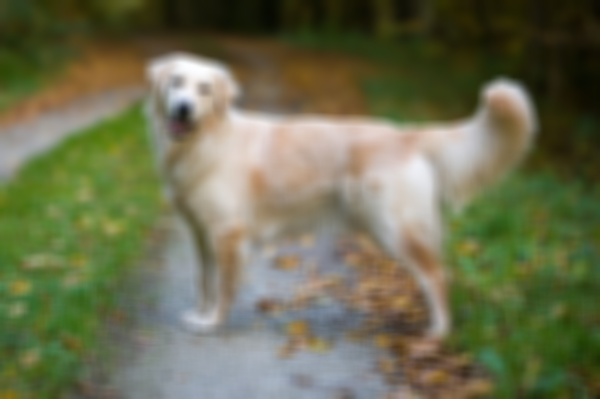

In [ ]:
"""
        blur_limit (int, (int, int)): maximum kernel size for blurring the input image.
            Should be in range [3, inf). Default: (3, 7).
        p (float): probability of applying the transform. Default: 0.5.
"""
aug = A.Blur(blur_limit=(3,20))
blur = aug(image=originalImage)['image']
cv2_imshow(blur)

# Position augmentation
In position augmentations, the pixel positions of an image is changed.



## Crop 
Just crops a region from image

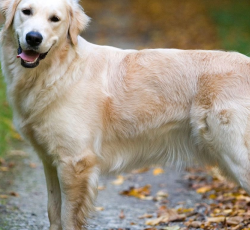

In [ ]:
"""
        x_min (int): Minimum upper left x coordinate.
        y_min (int): Minimum upper left y coordinate.
        x_max (int): Maximum lower right x coordinate.
        y_max (int): Maximum lower right y coordinate.


"""

aug = A.Crop(always_apply=False, p=1.0, x_min=150, y_min=70, x_max=400, y_max=300)
crop = aug(image=originalImage)['image']
cv2_imshow(crop)

## Rotate
Will rotate the image in specified direction

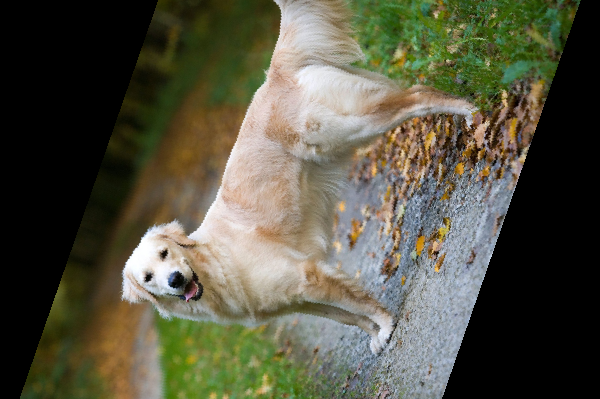

In [ ]:
"""
        limit ((int, int) or int): range from which a random angle is picked. If limit is a single int
            an angle is picked from (-limit, limit). Default: (-90, 90)
        interpolation (OpenCV flag): flag that is used to specify the interpolation algorithm. Should be one of:
            cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA, cv2.INTER_LANCZOS4.
            Default: cv2.INTER_LINEAR.
        border_mode (OpenCV flag): flag that is used to specify the pixel extrapolation method. Should be one of:
            cv2.BORDER_CONSTANT, cv2.BORDER_REPLICATE, cv2.BORDER_REFLECT, cv2.BORDER_WRAP, cv2.BORDER_REFLECT_101.
            Default: cv2.BORDER_REFLECT_101
        value (int, float, list of ints, list of float): padding value if border_mode is cv2.BORDER_CONSTANT.
        mask_value (int, float,
                    list of ints,
                    list of float): padding value if border_mode is cv2.BORDER_CONSTANT applied for masks.
        p (float): probability of applying the transform. Default: 0.5.

"""


aug = A.Rotate(always_apply=False, p=1.0, limit=(-90, 90), interpolation=0, border_mode=0, value=(0, 0, 0), mask_value=None)
rot = aug(image=originalImage)['image']
cv2_imshow(rot)

## Elastic Transform


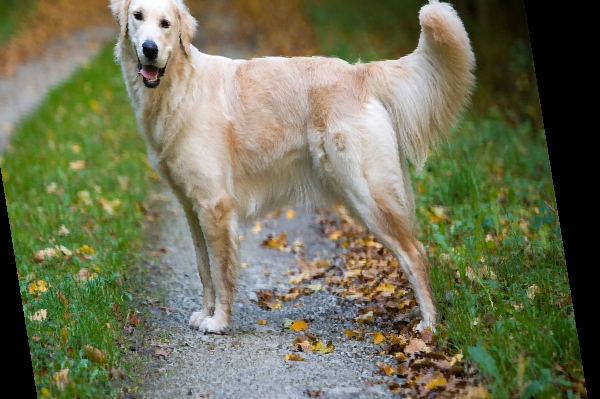

In [ ]:
"""
        alpha (float):
        sigma (float): Gaussian filter parameter.
        alpha_affine (float): The range will be (-alpha_affine, alpha_affine)
        interpolation (OpenCV flag): flag that is used to specify the interpolation algorithm. Should be one of:
            cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA, cv2.INTER_LANCZOS4.
            Default: cv2.INTER_LINEAR.
        border_mode (OpenCV flag): flag that is used to specify the pixel extrapolation method. Should be one of:
            cv2.BORDER_CONSTANT, cv2.BORDER_REPLICATE, cv2.BORDER_REFLECT, cv2.BORDER_WRAP, cv2.BORDER_REFLECT_101.
            Default: cv2.BORDER_REFLECT_101
        value (int, float, list of ints, list of float): padding value if border_mode is cv2.BORDER_CONSTANT.
        mask_value (int, float,
                    list of ints,
                    list of float): padding value if border_mode is cv2.BORDER_CONSTANT applied for masks.
        approximate (boolean): Whether to smooth displacement map with fixed kernel size.
                               Enabling this option gives ~2X speedup on large images.
"""

aug = A.ElasticTransform(always_apply=False, p=1.0, alpha=1.0, sigma=50.0, alpha_affine=50.0, interpolation=0, border_mode=0, value=(0, 0, 0), mask_value=None, approximate=False)
elt = aug(image=originalImage)['image']
cv2_imshow(elt)

## Grid Distortion


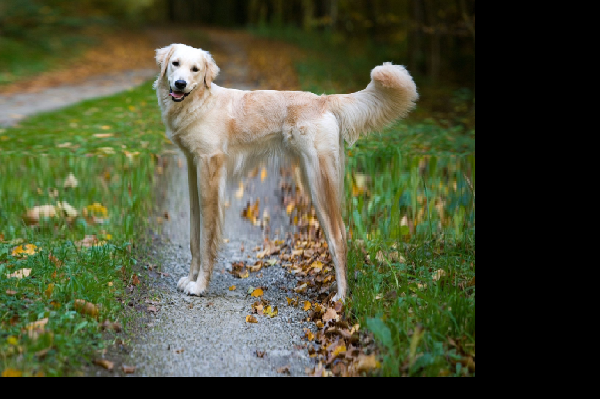

In [ ]:
"""
    num_steps (int): count of grid cells on each side.
    distort_limit (float, (float, float)): If distort_limit is a single float, the range
        will be (-distort_limit, distort_limit). Default: (-0.03, 0.03).
    interpolation (OpenCV flag): flag that is used to specify the interpolation algorithm. Should be one of:
        cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA, cv2.INTER_LANCZOS4.
        Default: cv2.INTER_LINEAR.
    border_mode (OpenCV flag): flag that is used to specify the pixel extrapolation method. Should be one of:
        cv2.BORDER_CONSTANT, cv2.BORDER_REPLICATE, cv2.BORDER_REFLECT, cv2.BORDER_WRAP, cv2.BORDER_REFLECT_101.
        Default: cv2.BORDER_REFLECT_101
    value (int, float, list of ints, list of float): padding value if border_mode is cv2.BORDER_CONSTANT.
    mask_value (int, float,
                list of ints,
                list of float): padding value if border_mode is cv2.BORDER_CONSTANT applied for masks.
"""


aug = A.GridDistortion(always_apply=False, p=1.0, num_steps=5, distort_limit=(-0.5, 0.8), interpolation=0, border_mode=0, value=(0, 0, 0), mask_value=None)
gd = aug(image=originalImage)['image']
cv2_imshow(gd)